# Mall Customer Segmentation

Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics. The market researcher can segment customers into the B2C model using various customer's demographic characteristics such as occupation, gender, age, location, and marital status. Psychographic characteristics such as social class, lifestyle and personality characteristics and behavioral characteristics such as spending, consumption habits, product/service usage, and previously purchased products. In the B2B model using various company's characteristics such as the size of the company, type of industry, and location.

In this notebook I have done customer segmentation in two ways
1. Using K-means: To understand the customers like who can be easily converged [target customers] so that it can be passed on to the marketing team and plan the strategy accordingly.
2. We segment customers using RFM(Recency, Frequency, Monetary) in the later part of this notebook.

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mall_data =pd.read_csv("Mall_Customers.csv")
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking the dimension of the data 
print("Dimensions of mall data: ",mall_data.shape)

Dimensions of mall data:  (200, 5)


In [5]:
#lets check the quality of the data

mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#double check if there are any nulls present in the data

mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No blank values!

In [16]:
X=mall_data.iloc[:,[3,4]].values
X[1:10]

array([[15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

** Considering only income and spending power for the analysis. **

In [18]:
from sklearn.cluster import KMeans

Building the model!
Using KMeans algorithm to decide the optimum cluster numbers using an elbow method.
Elbow method is plotted wcss vs number of cluster.
WCSS: Within cluster sum of squares
    
The breaking point of elbow from which the error becomes almost consistent we choose that as the number of clusters.

In [19]:
wcss=[] #creating an empty list to store wcss from each cluster

In [20]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters

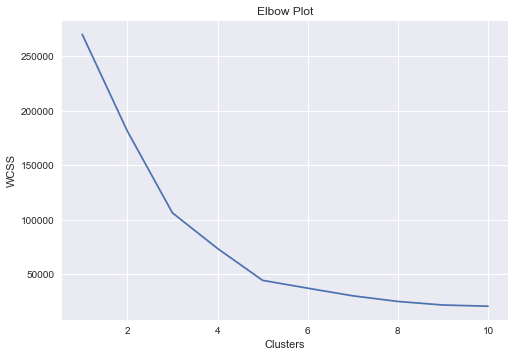

In [21]:
#plotting the elbow graph

plt.plot(range(1,11),wcss)
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

It can be obsereved that the cluster's error becomes constant after k=5!
Hence, k=5 will be appropriate for the kmeans algorithm for this data

In [25]:
#Building model
kmeans_model = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans_model.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.

In [26]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [35]:
copymalldata = mall_data

In [37]:
copymalldata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
copymalldata['clusters'] = y_kmeans

In [39]:
copymalldata.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4


After combining the real data with the clusters we can see which cluster each of the customers belong too for further deeper analysis and to decide the marketing strategy.

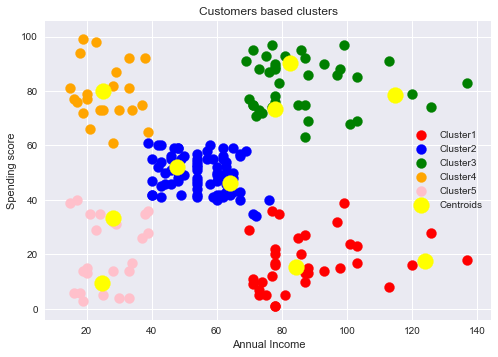

In [40]:
#plotting the clusters
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label = 'Cluster3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='orange', label='Cluster4')
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=100, c='pink', label='Cluster5')

#clusters centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 250, c='yellow', label= 'Centroids')

plt.title("Customers based clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

# Customer Segmentation using RFM

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business.

- Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
- Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
- Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
data_rfm = pd.read_csv('data.csv',encoding="ISO-8859-1", dtype={'CustomerID':str, 'InvoiceID':str})

In [4]:
data_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [7]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [8]:
data_rfm.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [5]:
#there are many blanks in customer values. Removing it

data_rfm = data_rfm[pd.notnull(data_rfm['CustomerID'])]

In [6]:
filtered_data = data_rfm[['Country', 'CustomerID']].drop_duplicates()

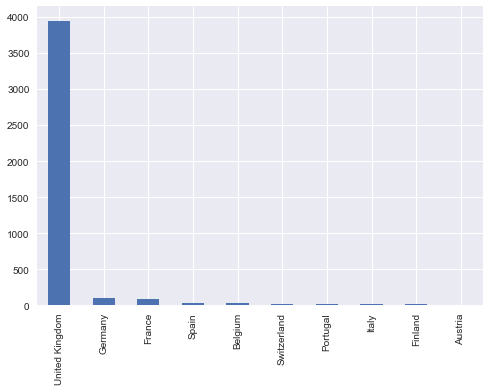

In [9]:
#Top ten country's by customer
filtered_data.Country.value_counts()[:10].plot(kind = 'bar')
plt.show()

Since most of the are based of UK. So I have analysed for UK

In [10]:
uk_data = data_rfm[data_rfm.Country == 'United Kingdom']

In [11]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [17]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null object
UnitPrice      361878 non-null float64
CustomerID     361878 non-null object
Country        361878 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 24.8+ MB


There are not more blank data. It is good for analysis now!

In [18]:
uk_data.describe()

,Quantity,UnitPrice
count,361878.000000,361878.000000
mean,11.077029,3.256007
std,263.129266,70.654731
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


There are a lot of negative quantity which means returns which we will be ignoring for this analysis.

you can filter the necessary columns for RFM analysis. You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. CustomerId will uniquely define your customers, InvoiceDate help you calculate recency of purchase, InvoiceNo helps you to count the number of time transaction performed(frequency). Quantity purchased in each transaction and UnitPrice of each unit purchased by the customer will help you to calculate the total purchased amount.

In [12]:
uk_data = uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [13]:
uk_data['TotalPrice'] = uk_data['Quantity']*uk_data['UnitPrice']

In [14]:
uk_data['InvoiceDate'].min(), uk_data['InvoiceDate'].max()

('1/10/2011 10:32', '9/9/2011 9:52')

In [15]:
#Converting InvoiceDate to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [16]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850,2010-12-01 08:26:00,536365,6,3.39,20.34


Since the dates in data is from year 2011. I will assume that the date today is 2011-Dec. For better analysis purposes

- For Recency, Calculate the number of days between present date and date of last purchase each customer
- For Frequency, Calculate the number of orders for each customer
- For Monetary, Calculate the sum of purchase price for each customer

In [18]:
PRESENT = pd.datetime(2011,12,10)
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [30]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [19]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346,325,2,0.00
12747,2,103,4196.01
12748,0,4642,29072.10
12749,3,231,3868.20
12820,3,59,942.34


Changing the column names

In [20]:
rfm.columns = ['monetary', 'freq', 'recency']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,monetary,freq,recency
CustomerID,,,
12346,325,2,0
12747,2,103,4196
12748,0,4642,29072
12749,3,231,3868
12820,3,59,942


Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.
qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [21]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['freq'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [22]:
rfm.head()

,monetary,freq,recency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,325,2,0,1,4,1
12747,2,103,4196,4,1,4
12748,0,4642,29072,4,1,4
12749,3,231,3868,4,1,4
12820,3,59,942,3,2,4


In [23]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,monetary,freq,recency,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346,325,2,0,1,4,1,141
12747,2,103,4196,4,1,4,414
12748,0,4642,29072,4,1,4,414
12749,3,231,3868,4,1,4,414
12820,3,59,942,3,2,4,324


# Conclusion

RFM analysis helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.